<a href="https://colab.research.google.com/github/Karis-ilham/karis-ilham/blob/main/2318093DataVisualisasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **1. Import Libraries**

In [31]:
# Matplotlib digunakan untuk membuat visualisasi data
# Pandas digunakan untuk membaca dan mengolah data Excel

import pandas as pd
import matplotlib.pyplot as plt



# **2. Menghubungkan Google Drive ke Google Colabs**

In [32]:
# Jika menggunakan Google Colab, file di Drive harus di-mount terlebih dahulu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




# **3. Persiapan Dataset**

In [33]:
# Ganti path di bawah ini sesuai dengan lokasi file kamu di Google Drive
# Misal file bernama 'dataset_bersih.xlsx' di folder MyDrive/Dataset/
file_path = "/content/drive/MyDrive/Colab Notebooks/dataset_bersih.xlsx"

df = pd.read_excel(file_path)
print("Jumlah baris dan kolom:", df.shape)
print("Kolom yang tersedia:", df.columns)
df.head()

Jumlah baris dan kolom: (32, 6)
Kolom yang tersedia: Index(['kode_pelanggan', 'nama_pelanggan', 'alamat', 'no_hp', 'produk',
       'tanggal_transaksi'],
      dtype='object')


,kode_pelanggan,nama_pelanggan,alamat,no_hp,produk,tanggal_transaksi
0,CUST-42,Andi,Jl. Melati No. 12,62876290412,Celana,2023-01-14
1,CUST-17,Siti,Jl. Kenanga No. 7,628118025907,Jaket,2023-09-07
2,CUST-27,Budi,Jl. Mawar No. 5,628745930323,Celana,2023-04-24
3,CUST-29,andi,Jl. Raya Timur KM 10,628295887086,Topi,2023-01-21
4,CUST-12,Agus,Jl. Kenanga No. 7,62804427240,Jaket,2023-02-11




# **4. MENAMBAHKAN KOLOM ORDER_MONTH PADA DATASET**

Menambahkan kolom bulan transaksi agar analisis GMV dapat dilakukan per bulan.

In [34]:
# Menambahkan kolom order_month dari kolom 'tanggal_transaksi'
df['tanggal_transaksi'] = pd.to_datetime(df['tanggal_transaksi'])
df['order_month'] = df['tanggal_transaksi'].dt.to_period('M').astype(str)

# Tampilkan hasilnya
df[['tanggal_transaksi', 'order_month']].head()

,tanggal_transaksi,order_month
0,2023-01-14,2023-01
1,2023-09-07,2023-09
2,2023-04-24,2023-04
3,2023-01-21,2023-01
4,2023-02-11,2023-02




# **5. AGREGASI DATA TRANSAKSIT**

Mengelompokkan jumlah transaksi berdasarkan bulan agar bisa melihat seberapa aktif pelanggan tiap bulan.

In [35]:
# Hitung jumlah transaksi per bulan
monthly_transaksi = df.groupby('order_month')['kode_pelanggan'].count().reset_index()
monthly_transaksi.rename(columns={'kode_pelanggan': 'jumlah_transaksi'}, inplace=True)

monthly_transaksi.head()

,order_month,jumlah_transaksi
0,2023-01,4
1,2023-02,3
2,2023-03,2
3,2023-04,3
4,2023-05,3




# **6. MEMBUAT LINE CHART JUMLAH TRANSAKSI PER BULAN**

Menampilkan grafik garis untuk melihat tren jumlah transaksi setiap bulan.

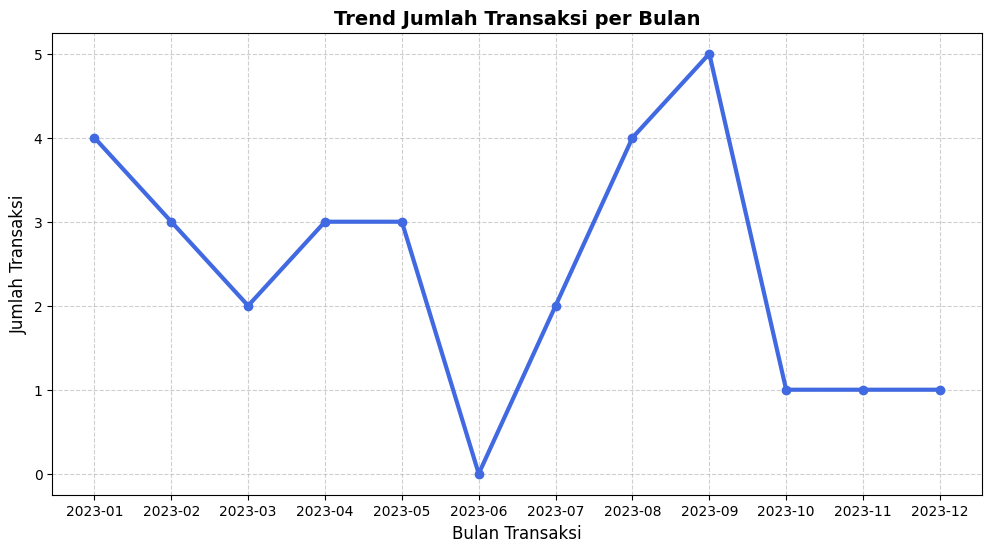

In [36]:
plt.figure(figsize=(12,6))
plt.plot(
    monthly_transaksi['order_month'],
    monthly_transaksi['jumlah_transaksi'],
    color='royalblue',
    linewidth=3,
    marker='o'
)
plt.title('Trend Jumlah Transaksi per Bulan', fontsize=14, weight='bold')
plt.xlabel('Bulan Transaksi', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



# **7. KUSTOMISASI LINE DAN POINT**

Mengubah tampilan garis, warna, dan bentuk titik agar visual lebih menarik.

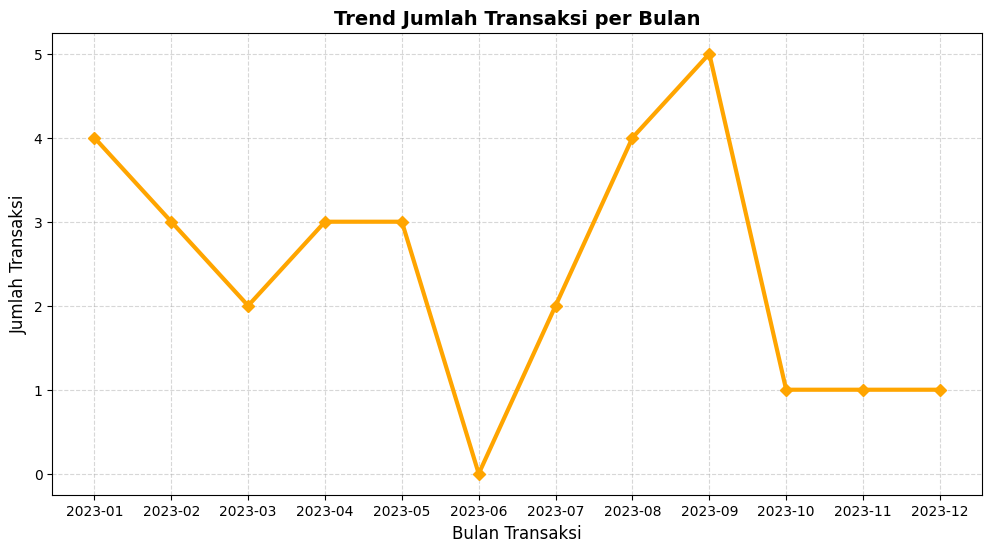

In [38]:
plt.figure(figsize=(12,6))
plt.plot(
    monthly_transaksi['order_month'],
    monthly_transaksi['jumlah_transaksi'],
    color='orange',
    linewidth=3,
    linestyle='solid',
    marker='D'   # diamond shape marker
)
plt.title('Trend Jumlah Transaksi per Bulan', fontsize=14, weight='bold')
plt.xlabel('Bulan Transaksi', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



# **8. MENAMBAHKAN GRID DAN ANOTASI**

Menambahkan garis bantu (grid) dan menandai bulan dengan transaksi tertinggi.

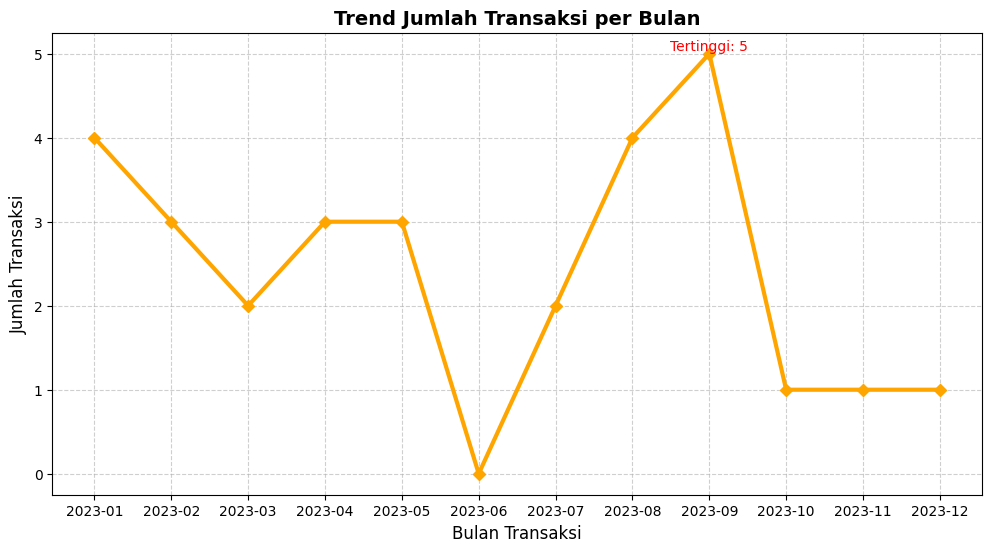

In [39]:
plt.figure(figsize=(12,6))
plt.plot(monthly_transaksi['order_month'], monthly_transaksi['jumlah_transaksi'],
         color='orange', linewidth=3, marker='D')
plt.title('Trend Jumlah Transaksi per Bulan', fontsize=14, weight='bold')
plt.xlabel('Bulan Transaksi', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Tambahkan teks pada titik tertinggi
max_transaksi = monthly_transaksi['jumlah_transaksi'].max()
max_bulan = monthly_transaksi.loc[monthly_transaksi['jumlah_transaksi'].idxmax(), 'order_month']
plt.text(max_bulan, max_transaksi, f'Tertinggi: {max_transaksi}', ha='center', va='bottom', fontsize=10, color='red')

plt.show()



# **9.JUMLAH TRANSAKSI BERDASARKAN PRODUK**

Melihat produk apa yang paling banyak dipesan pelanggan.

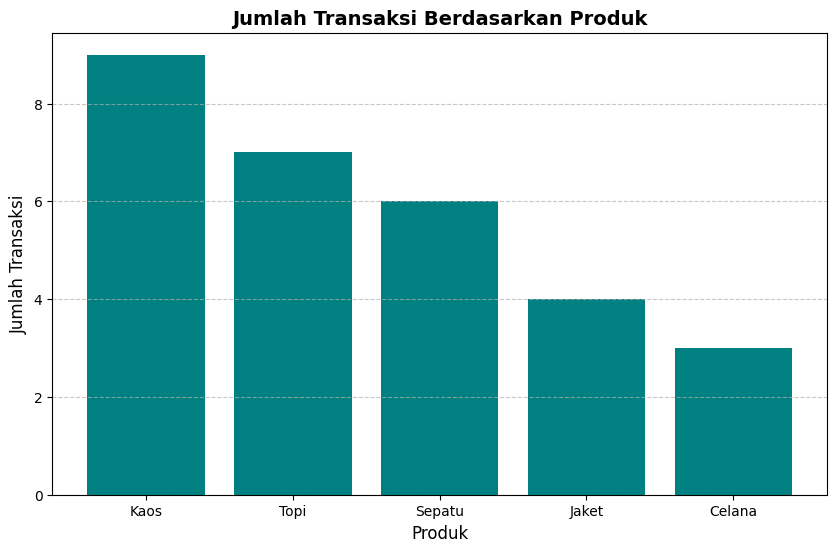

In [40]:
produk_counts = df['produk'].value_counts().reset_index()
produk_counts.columns = ['produk', 'jumlah_transaksi']

plt.figure(figsize=(10,6))
plt.bar(produk_counts['produk'], produk_counts['jumlah_transaksi'], color='teal')
plt.title('Jumlah Transaksi Berdasarkan Produk', fontsize=14, weight='bold')
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# **10. PIE CHART DISTRIBUSI PRODUK**

Menampilkan proporsi setiap produk dalam bentuk pie chart.

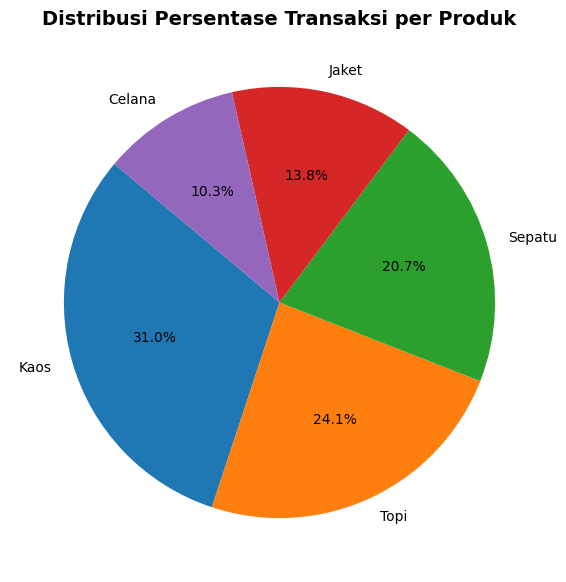

In [41]:
plt.figure(figsize=(7,7))
plt.pie(
    produk_counts['jumlah_transaksi'],
    labels=produk_counts['produk'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribusi Persentase Transaksi per Produk', fontsize=14, weight='bold')
plt.show()